# Projet Traitement du Signal

Romain LAGARDE, Tom SCHIPPKE


In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

**Remarque:**

Lors de tous les trac√©s de spectre, on ne tracera que la partie des fr√©quences positives pour plus de lisibilit√©. Le spectre √©tant sym√©trique par rapport √† l'origine, il est simple de s'imaginer l'affiche des fr√©quences positives et n√©gatives.

## I. Modulation et d√©modulation DSB-SC

### A. Modulation



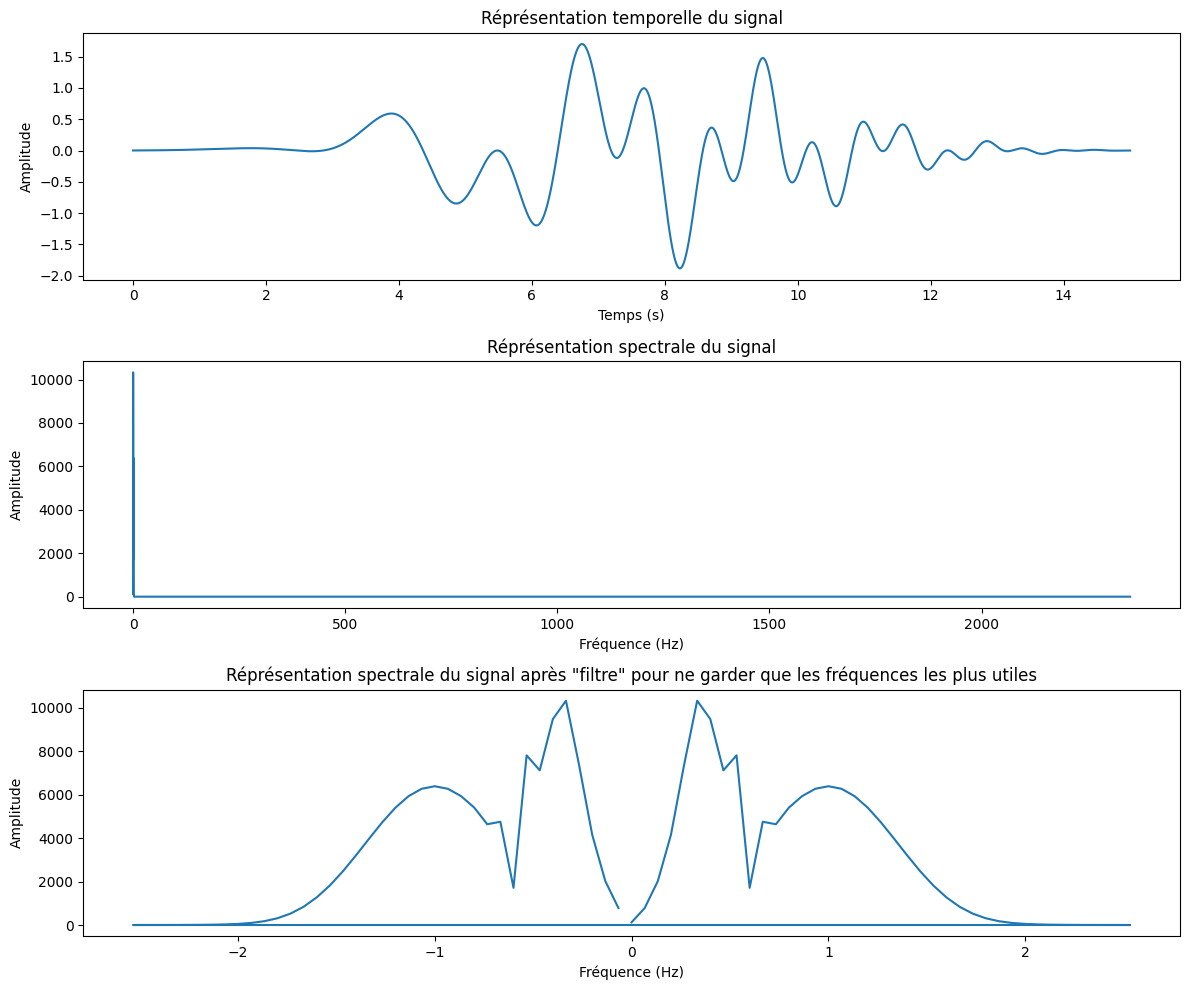

In [2]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal')

#Repr√©sentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')

indice_√†_garder = np.abs(X) > 1
X_tild=X[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


La Fr√©quence maximale du signal est approximativement **B=2Hz**.


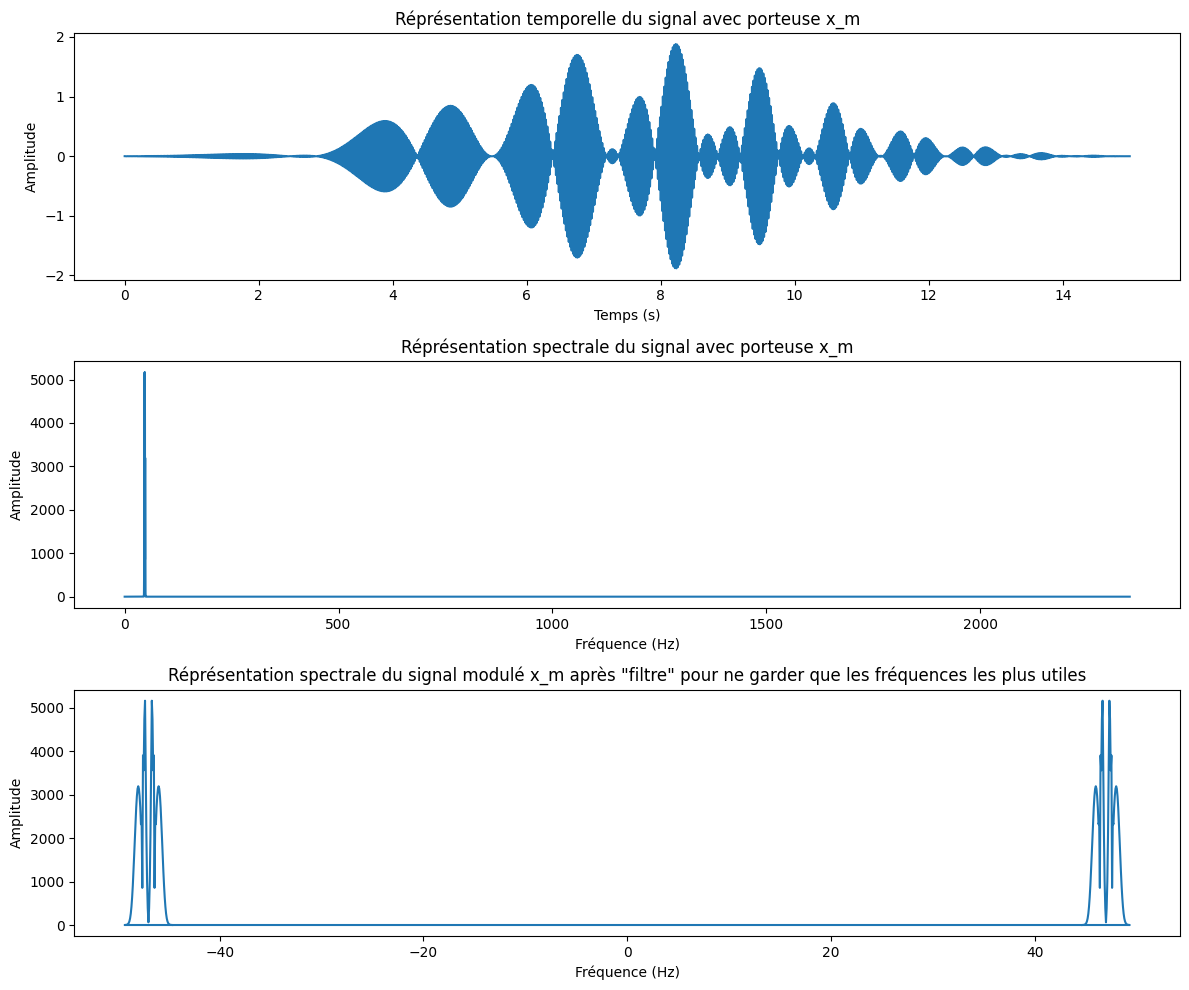

In [3]:
#fabrication du signal modul√©
x_m=x*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation √† double bande lat√©rale et porteuse supprim√©e) car **l'onde modul√©e est seulement constitu√©e des bandes lat√©rales sup√©rieure et inf√©rieure du signal**.

### B. D√©modulation synchrone ‚Äúanalogique‚Äù

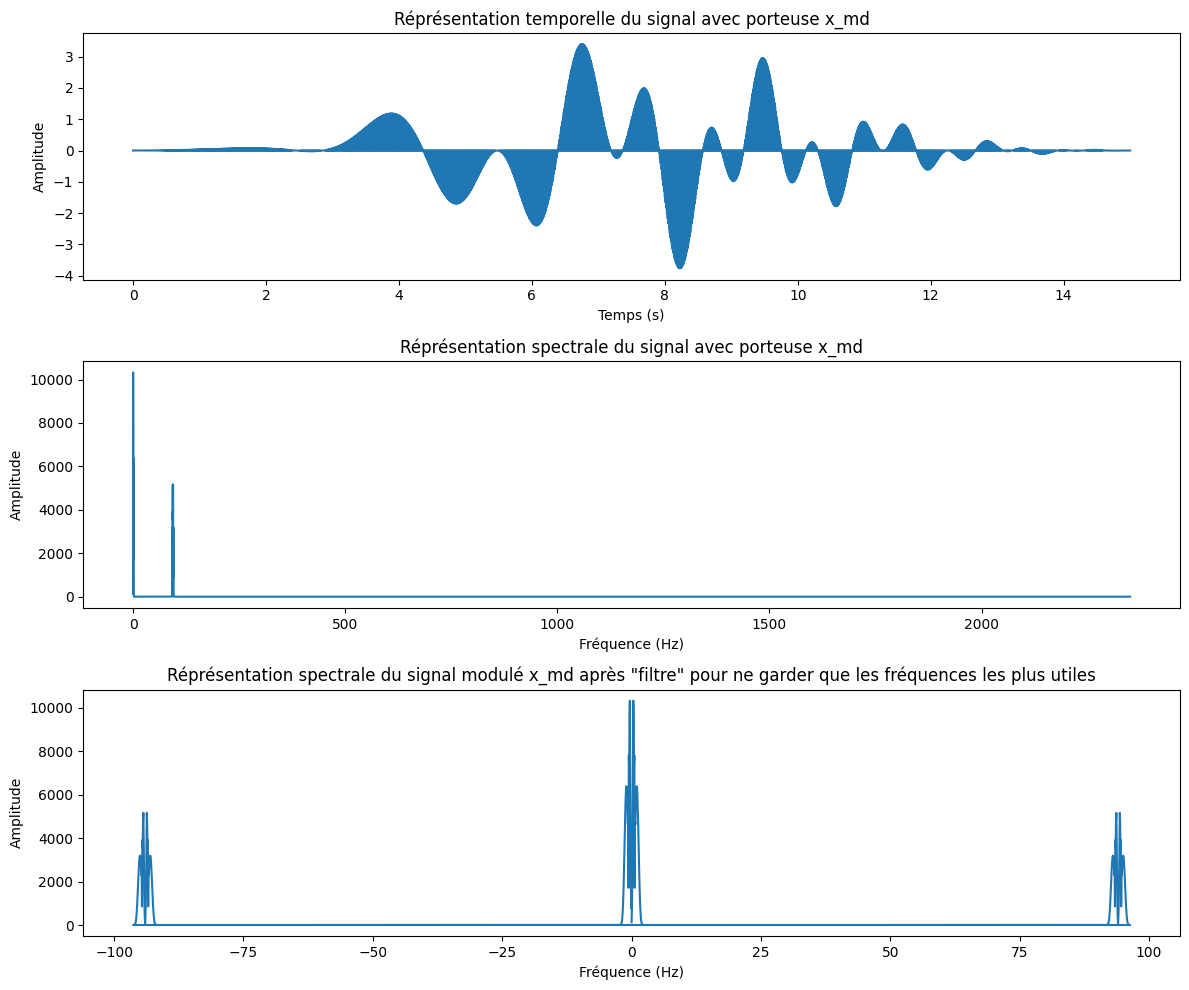

In [4]:
#fabrication du signal modul√©
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')

indice_√†_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


Pour filtrer le signal, on utilise un **filtre de Butterworth** de fr√©quence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement id√©al). On choisit ces valeurs num√©riques au vu des trac√©s et √©tudes pr√©c√©dentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du √† la modulation).


c:\miniconda\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


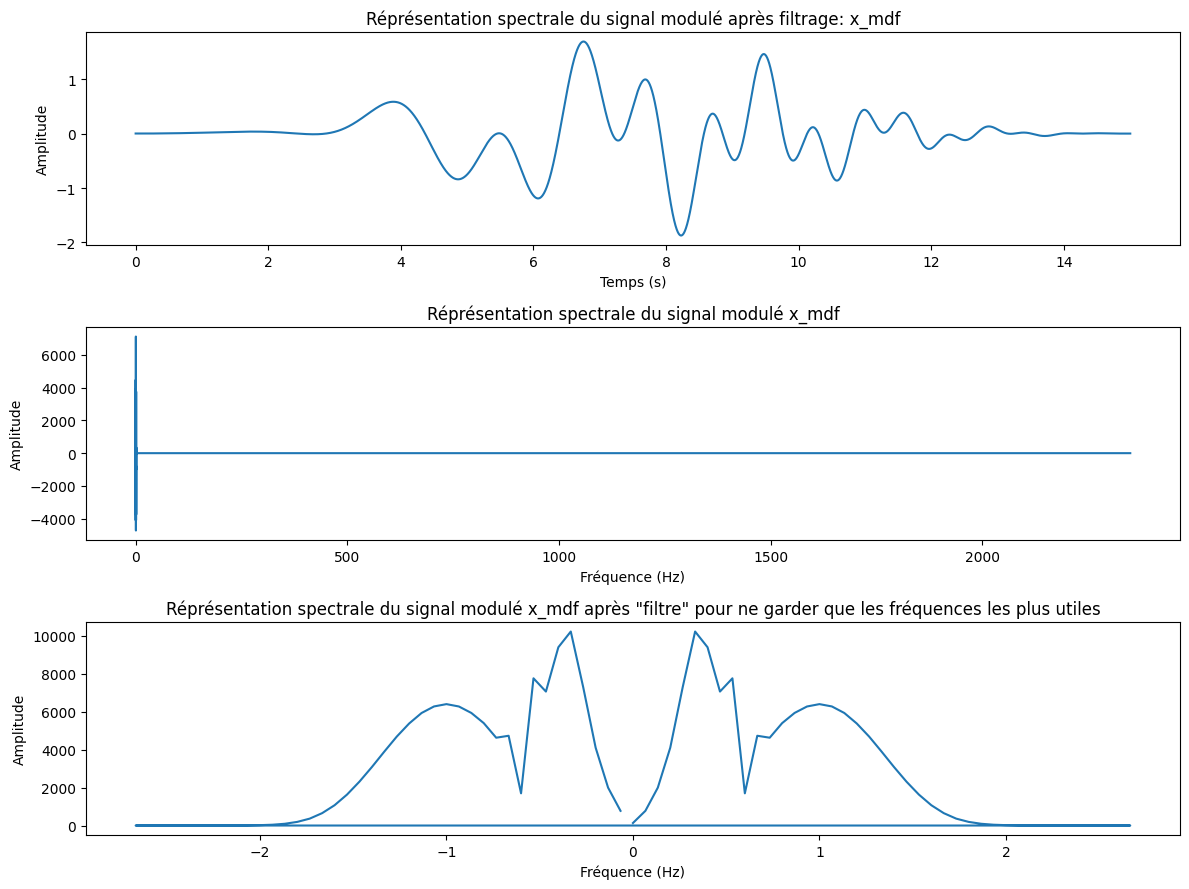

In [5]:
#filtre passe bas de fr√©quence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')

indice_√†_garder = np.abs(X_mdf) > 0.5
X_mdf_tild=X_mdf[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. En filtrant les hautes fr√©quences, on a supprim√© les composantes spectrales de fr√©quence plus grande que 40Hz. Ainsi, on a supprimer la modulation ajout√©e sur le signal.



Pour un √©chantillonage apr√®s d√©modulation, il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un √©chantillonage avant d√©modulation, il faudrait √©chantillonner $x_{m}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est pr√©f√©rable d'√©chantillonner le signal **apr√®s d√©modulation**, car ce dernier sera moins co√ªteux (fr√©quence d'√©chantillonnage $f_e$ plus faible dans ce cas).

### C. D√©modulation synchrone par sous-√©chantillonnage


[]

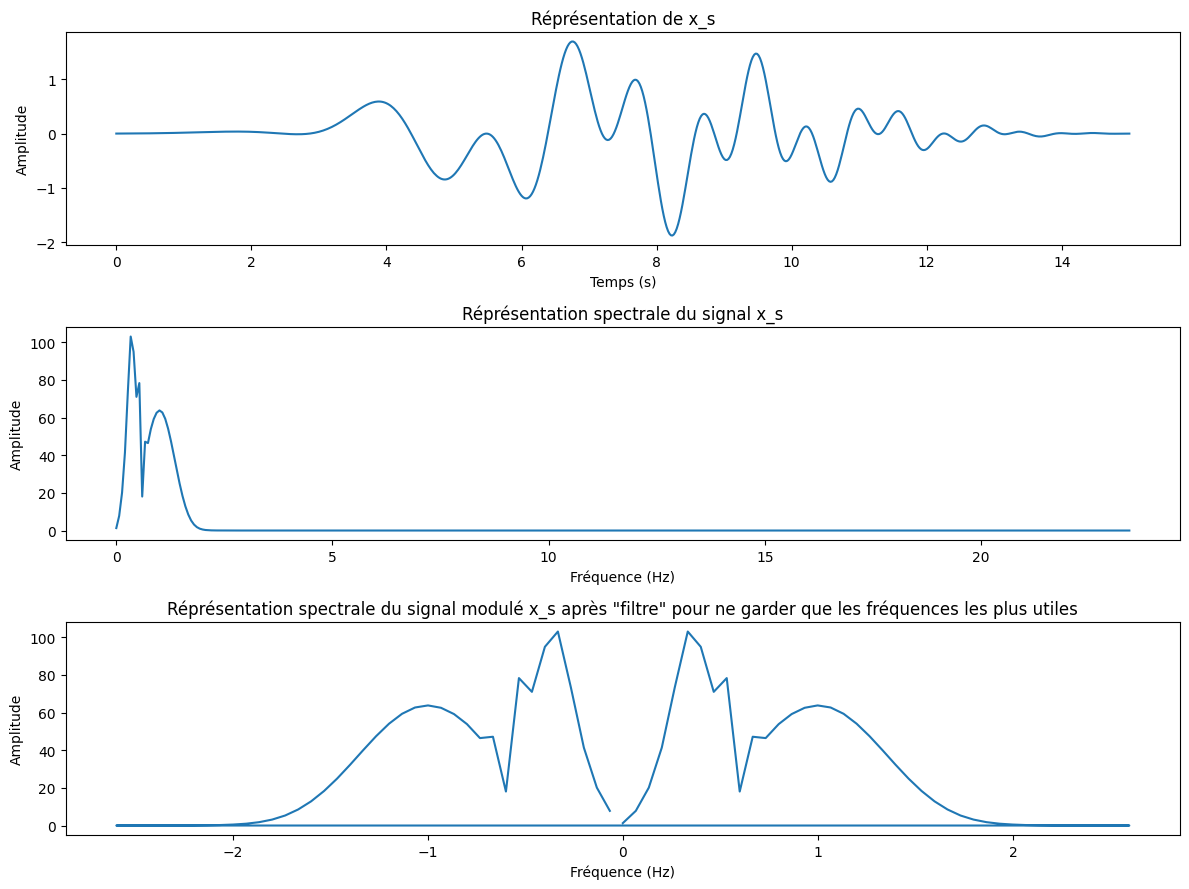

In [6]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')

indice_√†_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_√†_garder]
freq_s_tild=freq_s[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en √©chantillonnant √† une fr√©quence 47Hz): avec une fr√©quence bien choisie, on ne "r√©cup√®re" lors de l'√©chantillonage que les extremas de l'enveloppe du √† la modulation (i.e. du √† la multiplication par $cos(2 \pi f_c t)$).

Cette m√©thode √† l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'√©conomiser de la bande passante.



## II. Modulation-d√©modulation DSB-SC avec sinus

### A. Modulation


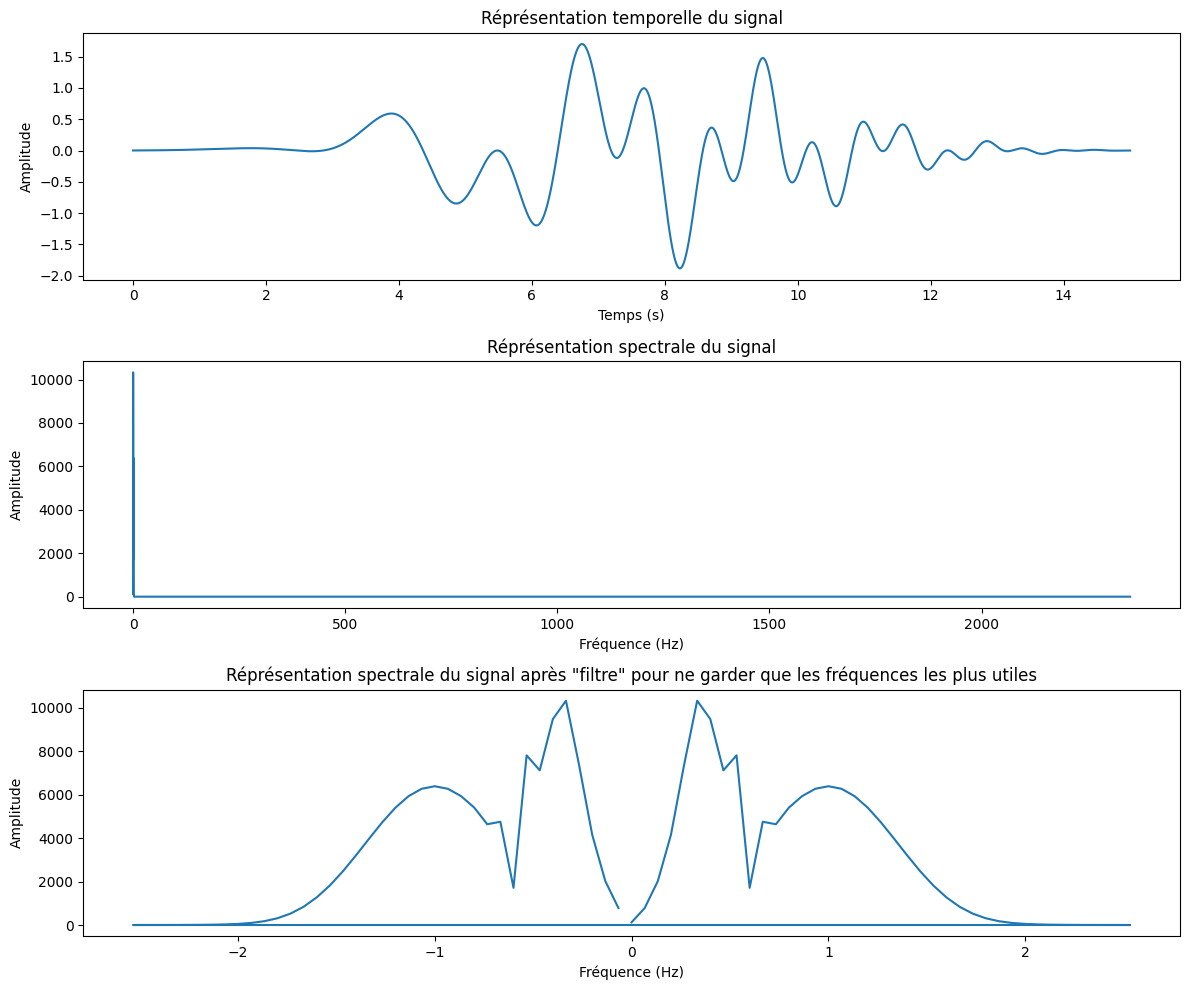

In [7]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal')

#Repr√©sentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')

indice_√†_garder = np.abs(X) > 1
X_tild=X[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

La Fr√©quence maximale du signal est approximativement **B=2Hz**.


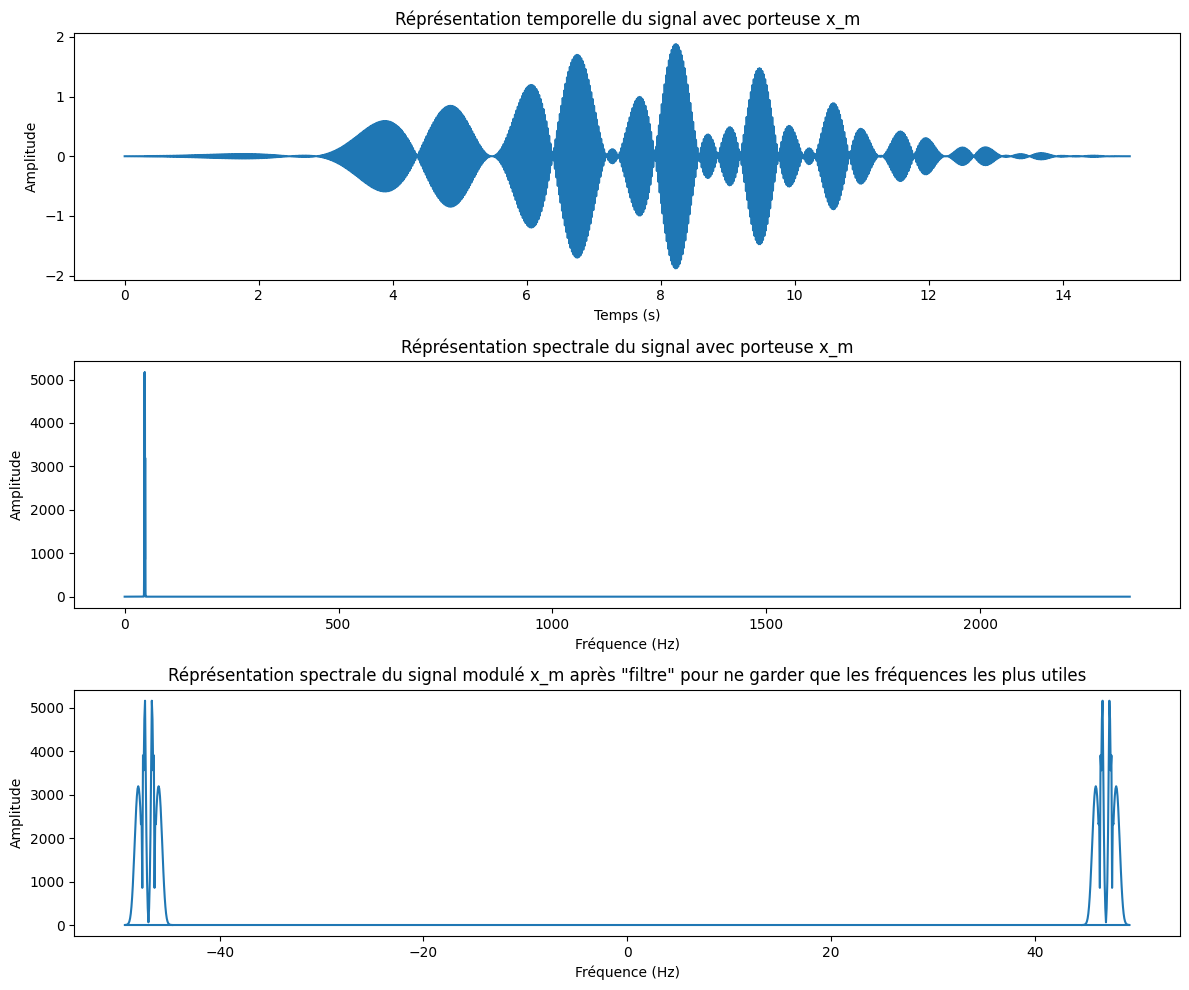

In [8]:
#fabrication du signal modul√©
x_m=x*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_m) > 1
X_m_tild=X_m[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On parle de **DSB-SC**, ou "Double sideband-suppressed carrier" (ou encore Modulation √† double bande lat√©rale et porteuse supprim√©e) car **l'onde modul√©e est seulement constitu√©e des bandes lat√©rales sup√©rieure et inf√©rieure du signal**.

### B. D√©modulation synchrone ‚Äúanalogique‚Äù

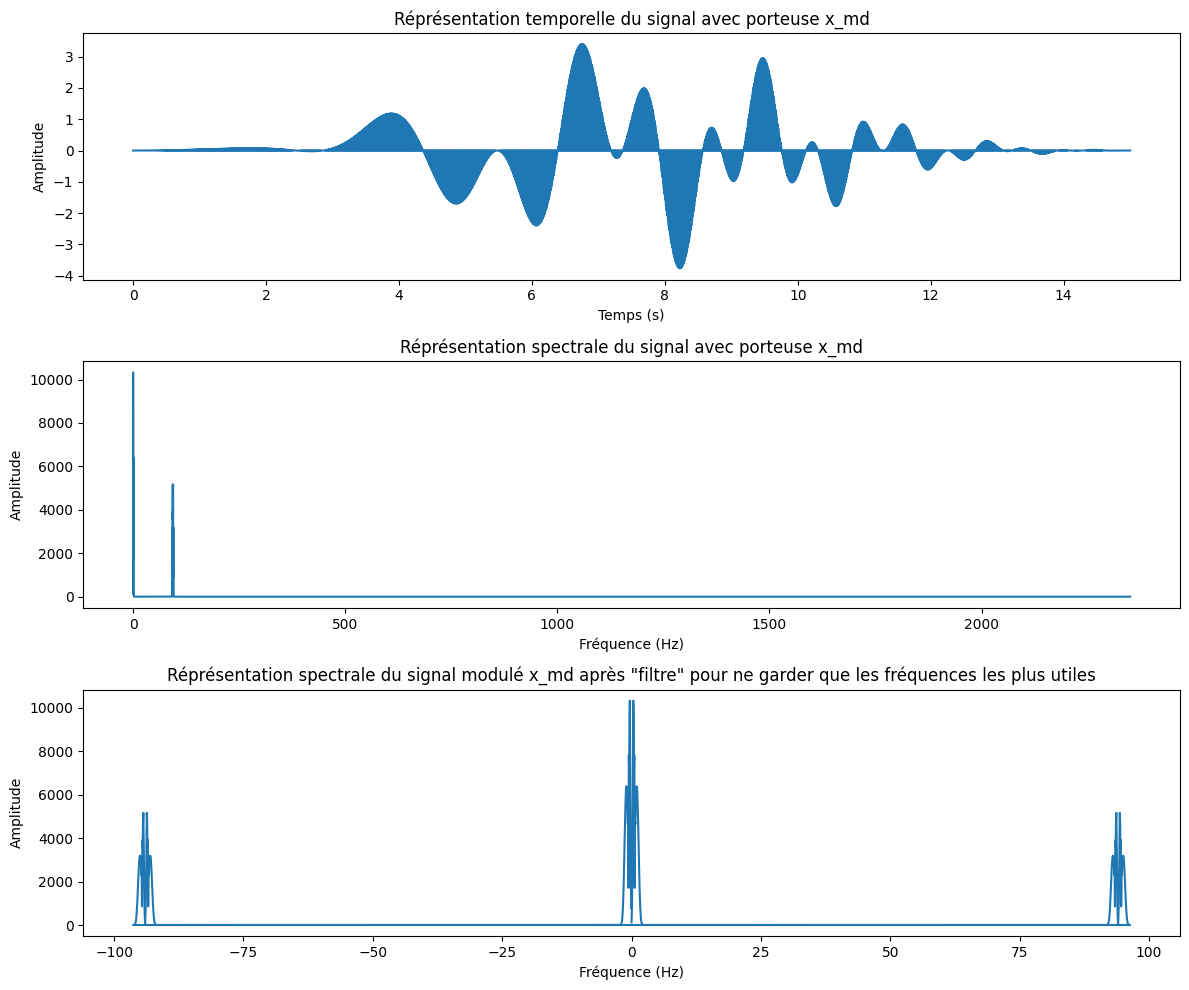

In [9]:
#fabrication du signal modul√©
x_md=2*x_m*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')

indice_√†_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


Pour filtrer le signal, on utilise un **filtre de Butterworth** de fr√©quence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement id√©al). On choisit ces valeurs num√©riques au vu des trac√©s et √©tudes pr√©c√©dentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du √† la modulation).


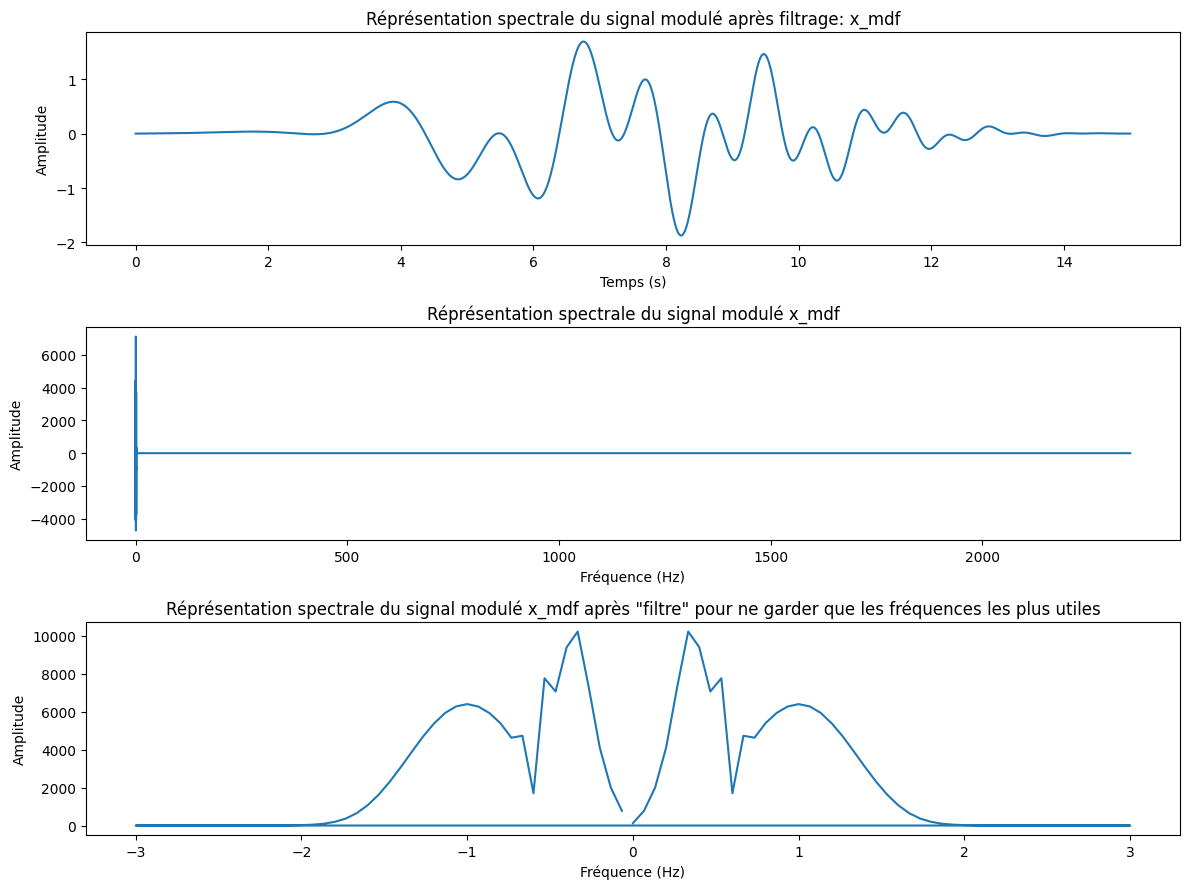

In [10]:
#filtre passe bas de fr√©quence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40


num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)


#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')

indice_√†_garder = np.abs(X_mdf) > 0.5
X_mdf_tild=X_mdf[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. La partie spectrale de la modulation reste tout de m√™me tr√®s l√©germent pr√©sente (au niveau de 97Hz), on pourrait, pour palier cela, utiliser un filtre passe bas d'ordre sup√©rieur.

Pour un √©chantillonage apr√®s d√©modulation, il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un √©chantillonage avant d√©modulation, il faudrait √©chantillonner $x_{m}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est pr√©f√©rable d'√©chantillonner le signal **apr√®s d√©modulation**, car ce dernier sera moins co√ªteux (fr√©quence d'√©chantillonnage $f_e$ plus faible dans ce cas).

### C. D√©modulation synchrone par sous-√©chantillonnage


Cette fois ci, afin de tenir ocmpte du fait que la modulation s'est faite avec la fonction $sinus$, on ajoute un d√©calage temporel de $\frac{1}{4f_c}$ afin d'√™tre sur de toujours r√©cup√©rer les "extremas" de l'enveloppe de la modulation (et non pas les "quarts" d'extremas du au d√©phasage du $sinus$ par rapport au $cosinus$).

[]

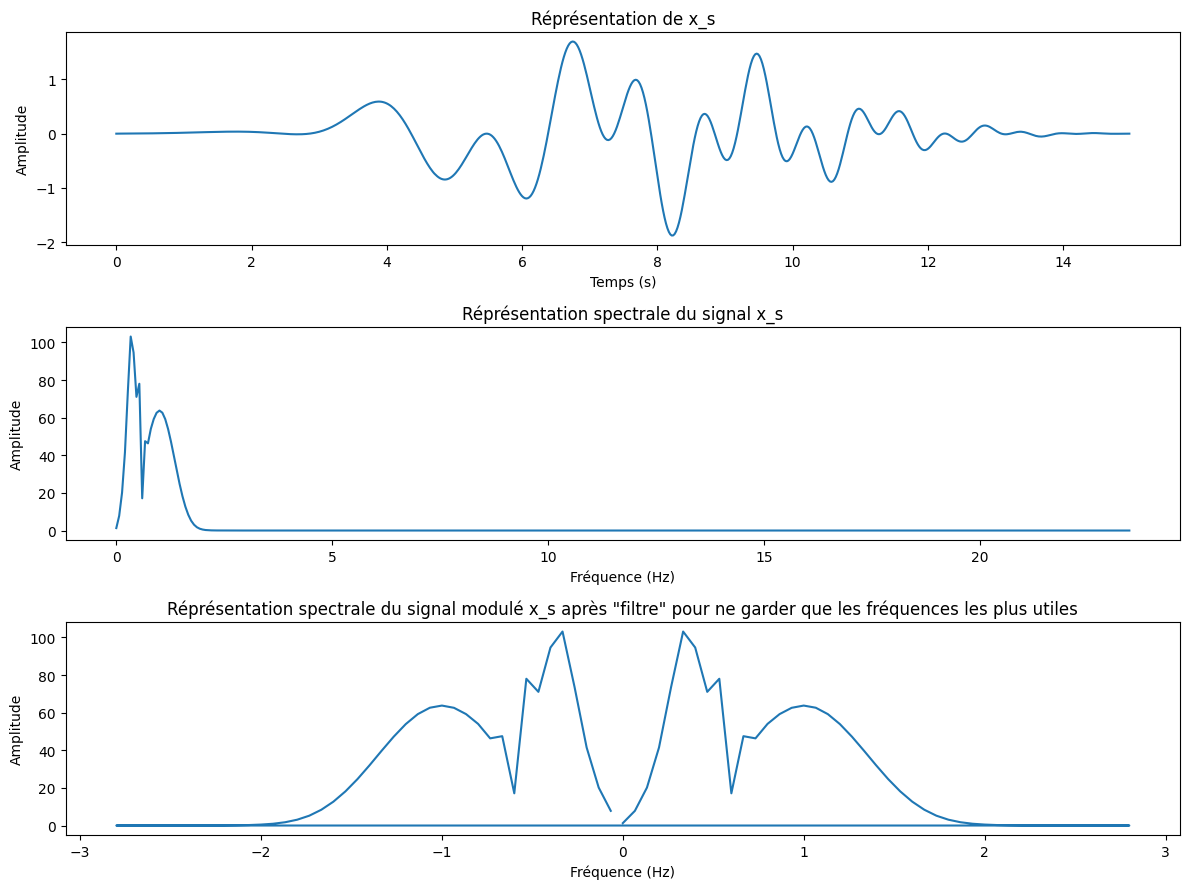

In [11]:
n=1

N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_s=[]
t1=[]
t_comp=int(0)
indice=0
while indice<(N_m-1):
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt
    indice=int(np.floor((t_comp+1/(4*fc))*N_m/T))


x_s=np.array(x_s)
t1=np.array(t1)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')

indice_√†_garder = np.abs(X_s) > 0.01
X_s_tild=X_s[indice_√†_garder]
freq_s_tild=freq_s[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.plot()

On ne retrouve pas le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en √©chantillonnant √† une fr√©quence 47Hz): avec cette fr√©quence bien choisie, on ne "r√©cup√®re" lors de l'√©chantillonage que les extremas de l'enveloppe du √† la modulation (i.e. du √† la multiplication par $cos(2 \pi f_c t)$). On peut r√©cup√©rer ces extremas en ajoutant un d√©calage temporel pour palier le fait que nous avons d√©sormais travaill√© avec un $sinus$ (et non plus un $cosinus$).

Cette m√©thode √† l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'√©conomiser de la bande passante.



## III. Modulation et d√©modulation QAM (Quadrature Amplitude Modulation)

La modulation DSB-SC vu pr√©c√©dement ‚Äúgaspille‚Äù de la bande passante car en modulant le signal initial, on a √©largi sa largeur spectrale (d'un facteur 2 dans le cas pr√©c√©dent car le spectre est devenu pair).  Dans cette partie on verra que l'on peut transmettre deux signaux diff√©rents avec la m√™me largeur spectrale pour $x_m$ ce qui repr√©sente un gain de bande passante de $50$%.


On s'int√©resse d√©sormais au signal modul√© $x_m(t) = x_I(t) cos(2\pi f_ct) + x_Q(t) sin(2\pi f_ct)$.


Pour le cas de la **d√©modulation synchrone ‚Äúanalogique‚Äù**, les identit√©s trigonom√©triques permettent de montrer que le filtrage permetra dans un cas de r√©cup√©rer $x_I$ et dans l'autre $x_Q$.


-Pour r√©cup√©rer $x_I$:


$x_{mdI}(t)=2x_m(t)cos(2\pi f_ct)=  2(x_I(t) cos(2\pi f_ct)^2 + x_Q(t) sin(2\pi f_ct)cos(2\pi f_ct)) = x_I(t) + x_I(t)cos(4\pi f_ct) + x_Q(t)sin(4\pi f_ct) $.

Ainsi, en filtrant $x_{mdI}$ √† une fr√©quence $f_e$ bien choisie on ne gardera que $x_I$ (sous l'hypoth√®se que les fr√©quences maximales de $x_I$ et $x_Q$ soit bien inf√©rieures √† $2f_c$).



-Pour r√©cup√©rer $x_Q$:

$x_{mdQ}(t)=2x_m(t)sin(2\pi f_ct)=  2(x_I(t) cos(2\pi f_ct)sin(2\pi f_ct) + x_Q(t) sin(2\pi f_ct)^2) = x_Q(t) - x_Q(t)cos(4\pi f_ct) + x_I(t)sin(4\pi f_ct)$.

De m√™me, en filtrant $x_{mdQ}$ √† une fr√©quence $f_e$ bien choisie on ne gardera que $x_Q$ (sous l'hypoth√®se que les fr√©quences maximales de $x_I$ et $x_Q$ soit bien inf√©rieures √† $2f_c$).

Pour le cas de la **d√©modulation synchrone par sous-√©chantillonnage**, √©tant donn√© le d√©phasage mis en lumi√®re pr√©c√©dement entre le $cosinus$ et le $sinus$, il est possible en choisissant une fr√©quence d'√©chantillongae ou l'autre (cf partie I.C et II.C) d'uniquement r√©cup√©rer  les extremas correspondants √† un des deux signaux. 

Par exemple comme le $sinus$ s'annule quand le $cosinus$ est extremum, en √©chantillonant √† la m√™me fr√©quence que dans I.C, on ne r√©cup√®rerera que les valeurs lors des extremas du $cosinus$ (et on ne r√©cuperera rien du $sinus$ √©tant donn√© que ce dernier sera nul aux instants d'√©chantillonage) correspondant donc aux valeurs du signal $x_I$. Il est ainsi possible de resconstruire $x_I$ √† partir de $x_m$. 

De m√™me pour $x_Q$.

### A. Modulation

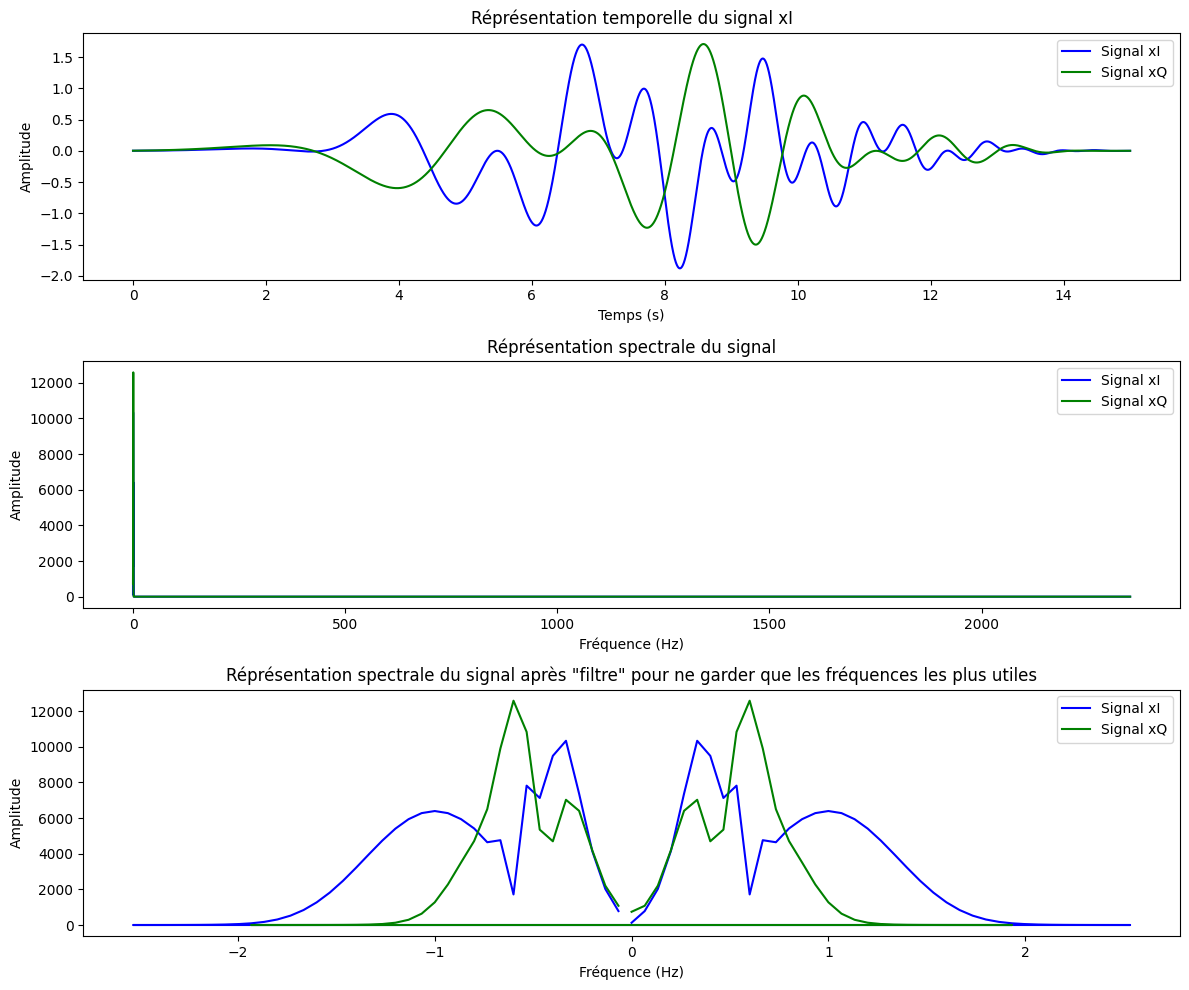

In [12]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T

xRawI = np.cos(pulsation1*t) + np.sin(pulsation2*t)
xRawQ = np.cos(pulsation1*t*3/5) + np.cos(pulsation2*t*10/9)


window = sig.windows.kaiser(N,9)
xI = xRawI*window
xQ = xRawQ*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,xI,color='blue', label='Signal xI')
plt.plot(t,xQ, color ='green', label='Signal xQ')

plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal xI')
plt.legend(loc='upper right')

#Repr√©sentation de la fft du signal

XI=np.fft.fft(xI)
freqI=np.fft.fftfreq(N, d=1/finfty)
XQ=np.fft.fft(xQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3,1, 2)
plt.plot(freqI[:N//2],np.abs(XI[:N//2]), color='blue', label='Signal xI') 
plt.plot(freqQ[:N//2],np.abs(XQ[:N//2]), color ='green', label='Signal xQ')  

plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(XI) > 1
X_tildI=XI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(XQ) > 1
X_tildQ=XQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]


plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_tildI), color ='blue', label='Signal xI')  
plt.plot(freq_tildQ,np.abs(X_tildQ), color ='green', label='Signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()


La fr√©quence maximale est alors d'environ $B=2Hz$.

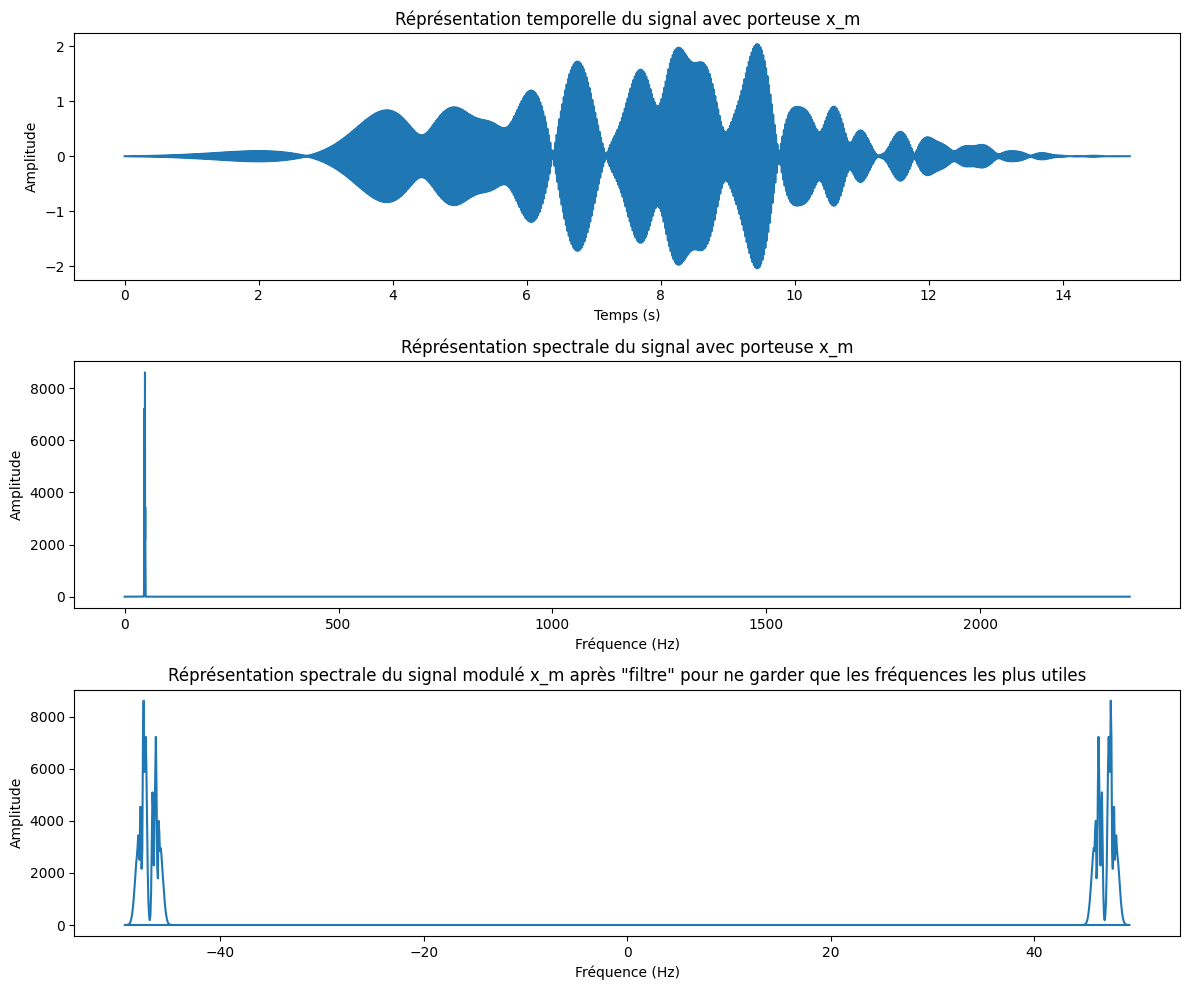

In [13]:
#fabrication du signal modul√©
x_mIQ=xI*np.cos(2*np.pi*fc*t)+xQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mIQ)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_mIQ=np.fft.fft(x_mIQ)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_mIQ[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_mIQ) > 1
X_m_tildIQ=X_mIQ[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_m_tildIQ))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On remarque qu'ici, tout comme dans I, la largeur spectrale est d'environ $4Hz$: on a bien "gagn√©" de la bande passante par rapport au cas I et II o√π l'on aurait transport√© les signaux $x_i$ et $x_Q$ s√©par√©ment (n√©cessitant l'envoie de deux signaux de largeur spectrale $4Hz$ chacun, pour un total de $8Hz$ √† transporter). 

### B. D√©modulation synchrone "analogique"

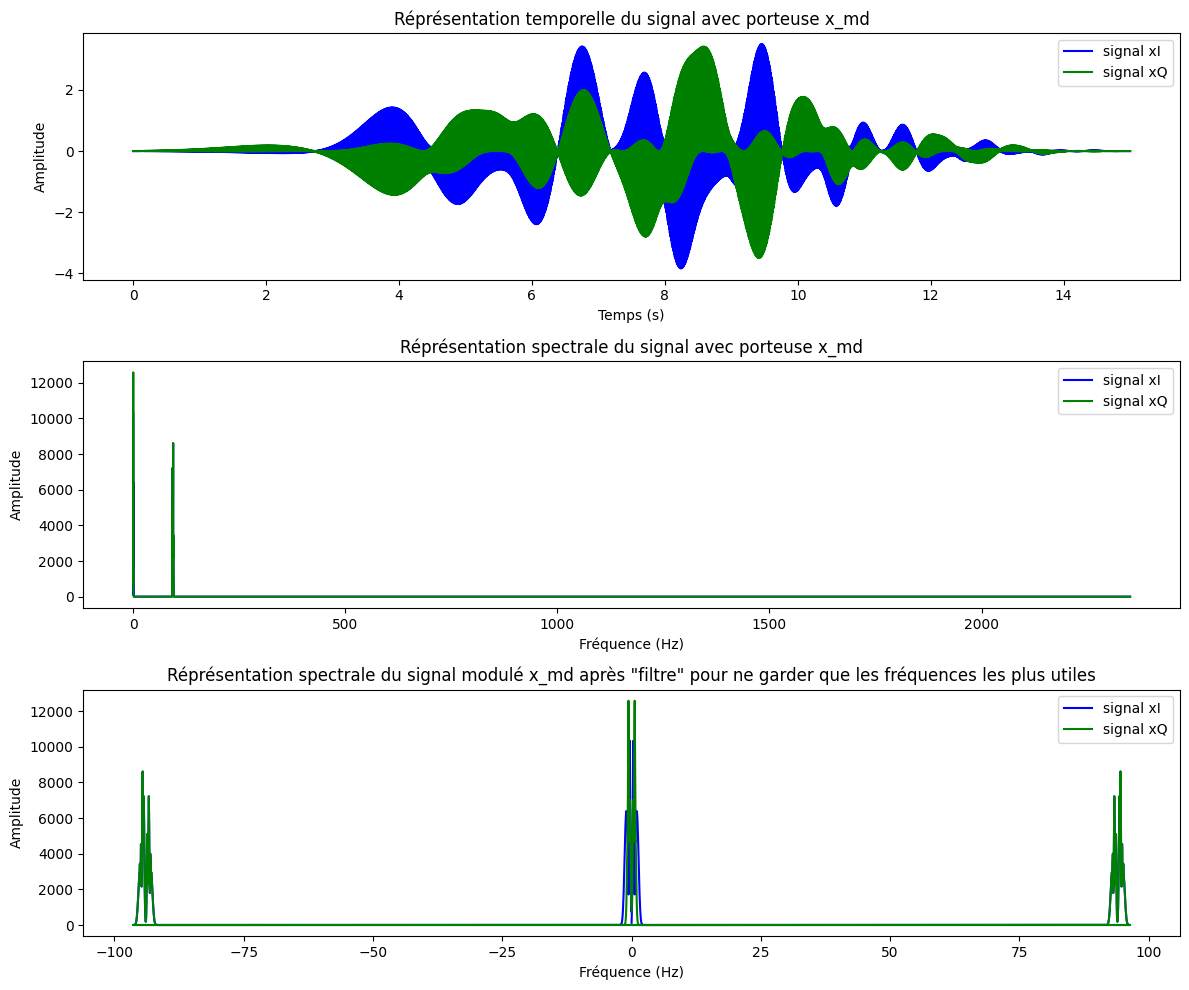

In [14]:
#fabrication du signal modul√©
x_mdI=2*x_mIQ*np.cos(2*np.pi*fc*t)
x_mdQ=2*x_mIQ*np.sin(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mdI, color='blue', label='signal xI')
plt.plot(t,x_mdQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')
plt.legend(loc='upper right')

X_mdI=np.fft.fft(x_mdI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdQ=np.fft.fft(x_mdQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],np.abs(X_mdI[:N//2]), color='blue', label='signal xI')
plt.plot(freqQ[:N//2],np.abs(X_mdQ[:N//2]), color='green', label='signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(X_mdI) > 1
X_md_tildI=X_mdI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_mdQ) > 1
X_md_tildQ=X_mdQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_md_tildI), color='blue', label='signal xI') 
plt.plot(freq_tildQ,np.abs(X_md_tildQ), color='green', label='signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


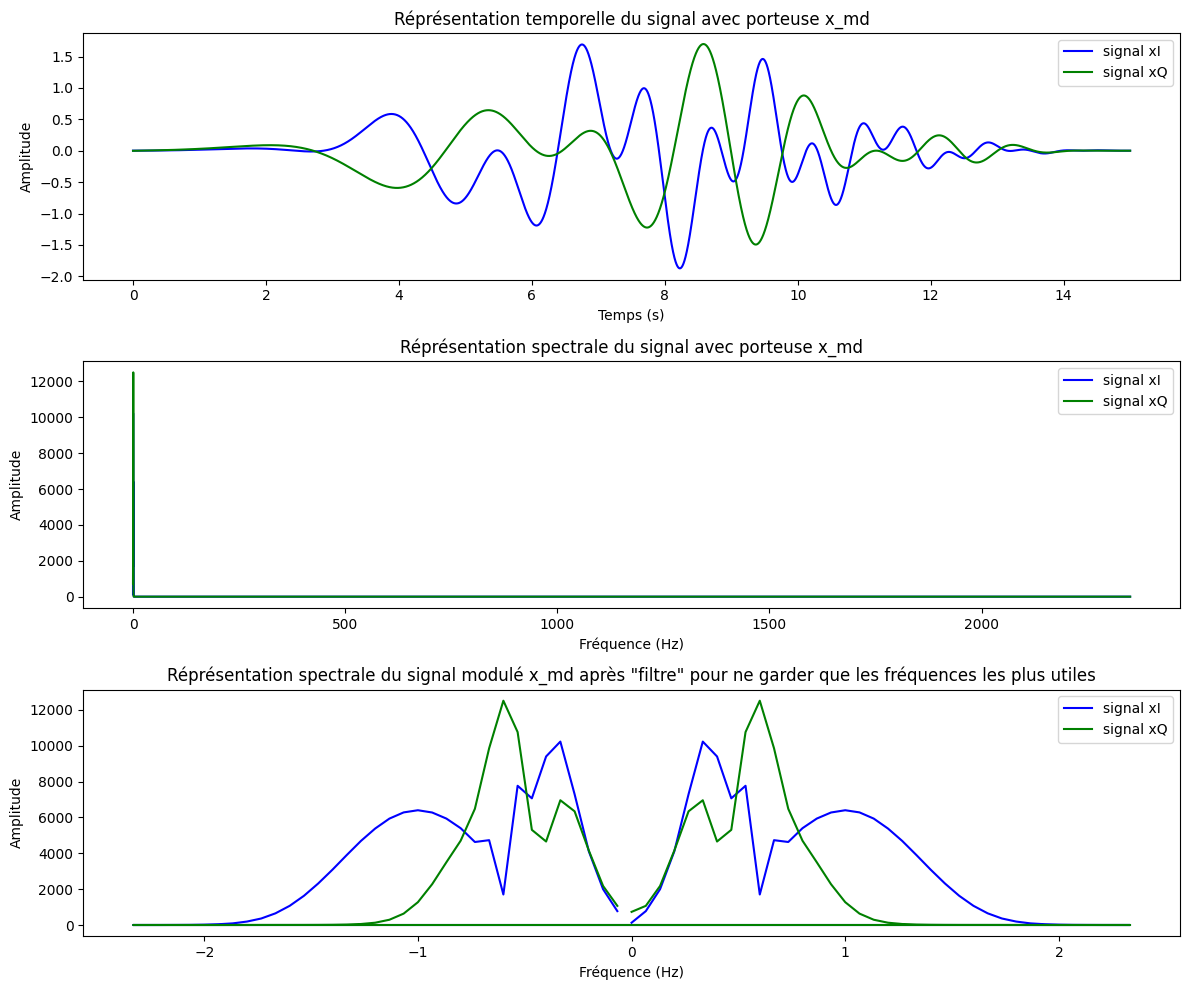

In [15]:
#filtre passe bas de fr√©quence de coupure: HZ
N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdfI=sig.filtfilt(num_low,den_low,x_mdI)
x_mdfQ=sig.filtfilt(num_low,den_low,x_mdQ)



# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_mdfI, color='blue', label='signal xI')
plt.plot(t,x_mdfQ, color='green', label='signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')
plt.legend(loc='upper right')

X_mdfI=np.fft.fft(x_mdfI)
freqI=np.fft.fftfreq(N, d=1/finfty)
X_mdfQ=np.fft.fft(x_mdfQ)
freqQ=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freqI[:N//2],np.abs(X_mdfI[:N//2]), color='blue', label='signal xI')
plt.plot(freqQ[:N//2],np.abs(X_mdfQ[:N//2]), color='green', label='signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(X_mdfI) > 1
X_mdf_tildI=X_mdfI[indice_√†_garderI]
freq_tildI=freqI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_mdfQ) > 1
X_mdf_tildQ=X_mdfQ[indice_√†_garderQ]
freq_tildQ=freqQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_tildI,np.abs(X_mdf_tildI), color='blue', label='signal xI') 
plt.plot(freq_tildQ,np.abs(X_mdf_tildQ), color='green', label='signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Comme pr√©vu en multipliant d'une part par un $sinus$ ou par un $cosinus$, on peut r√©cup√©rer les signaux initiaux uniquement √† l'aide de $x_m$. En filtrant les hautes fr√©quences, on a supprim√© les composantes spectrales de fr√©quence plus grande que $40Hz$. Ainsi, on a supprimer la modulation ajout√©e sur le signal.


Dans les deux cas, pour un √©chantillonage apr√®s d√©modulation, il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un √©chantillonage avant d√©modulation, il faudrait √©chantillonner $x_{m}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est pr√©f√©rable d'√©chantillonner le signal **apr√®s d√©modulation**, car ce dernier sera moins co√ªteux (fr√©quence d'√©chantillonnage $f_e$ plus faible dans ce cas).


### C. D√©modulation synchrone par sous-√©chantillonnage

[]

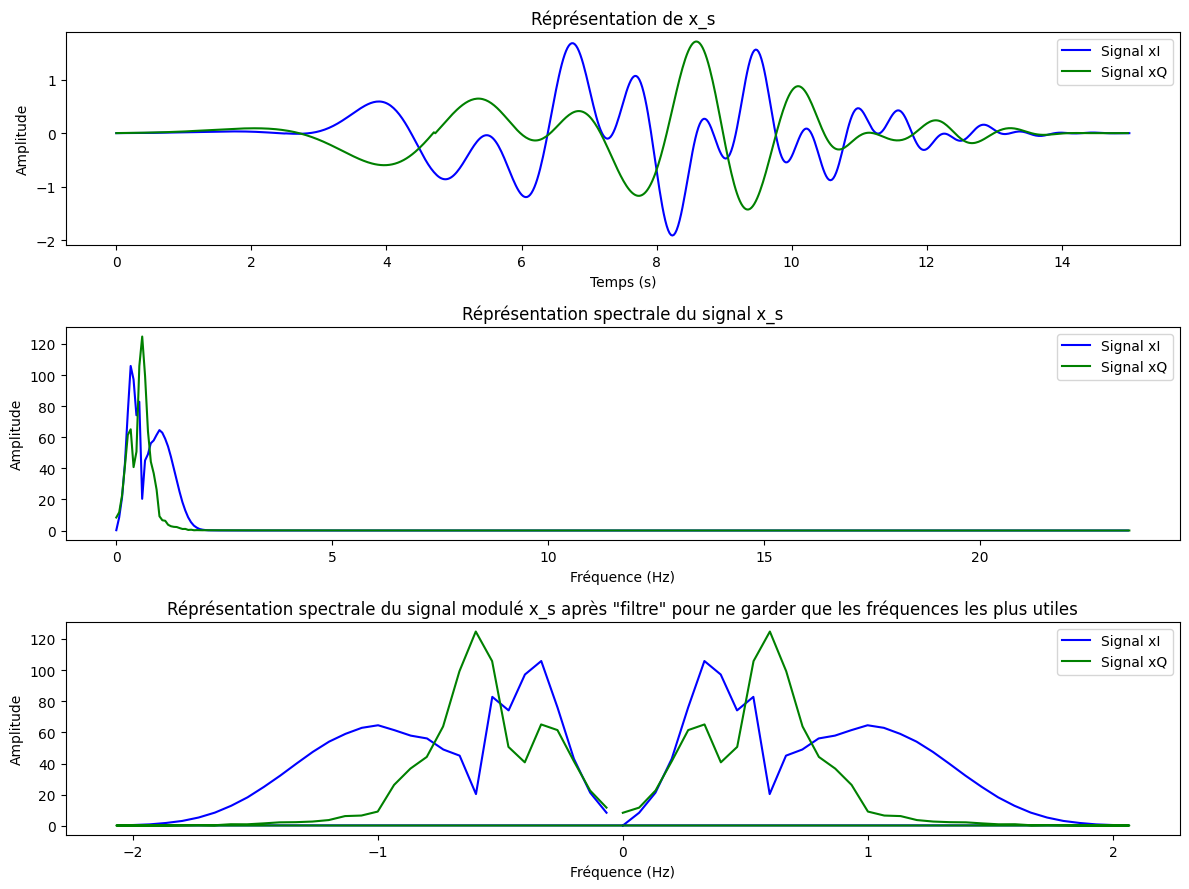

In [16]:
n=1
N_m=len(x_mIQ)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_sI=[]
t1I=[]
t_compI=int(0)

while t_compI<T:
    indice=int(np.floor(t_compI*N_m/T))
    x_sI.append(x_mIQ[indice])
    t1I.append(t_compI)
    t_compI+=dt

x_sQ=[]
t1Q=[]
t_compQ=int(0)
indiceQ=0
while indiceQ<(N_m-1):
    x_sQ.append(x_mIQ[indiceQ])
    t1Q.append(t_compQ)
    t_compQ+=dt
    indiceQ=int(np.floor((t_compQ+1/(4*fc))*N_m/T))


x_sI=np.array(x_sI)
t1I=np.array(t1I)
x_sQ=np.array(x_sQ)
t1Q=np.array(t1Q)


#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1I,x_sI, color='blue', label='Signal xI')
plt.plot(t1Q,x_sQ, color='green', label='Signal xQ')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')
plt.legend(loc='upper right')

X_sI=np.fft.fft(x_sI)
freq_sI=np.fft.fftfreq(len(X_sI), d=1/f_s)
X_sQ=np.fft.fft(x_sQ)
freq_sQ=np.fft.fftfreq(len(X_sQ), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_sI[freq_sI>=0],np.abs(X_sI[freq_sI>=0]), color='blue', label='Signal xI')
plt.plot(freq_sQ[freq_sQ>=0],np.abs(X_sQ[freq_sQ>=0]), color='green', label='Signal xQ')
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')
plt.legend(loc='upper right')

indice_√†_garderI = np.abs(X_sI) > 0.2
X_s_tildI=X_sI[indice_√†_garderI]
freq_s_tildI=freq_sI[indice_√†_garderI]
indice_√†_garderQ = np.abs(X_sQ) > 0.2
X_s_tildQ=X_sQ[indice_√†_garderQ]
freq_s_tildQ=freq_sQ[indice_√†_garderQ]

plt.subplot(3, 1, 3)
plt.plot(freq_s_tildI,np.abs(X_s_tildI), color='blue', label='Signal xI')  
plt.plot(freq_s_tildQ,np.abs(X_s_tildQ), color='green', label='Signal xQ')  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')
plt.legend(loc='upper right')

plt.tight_layout()
plt.plot()

 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en √©chantillonnant √† une fr√©quence 47Hz): avec une fr√©quence bien choisie, on ne "r√©cup√®re" lors de l'√©chantillonage que les extremas de l'enveloppe du √† la modulation (i.e. du √† la multiplication par $cos(2 \pi f_c t)$).

Cette m√©thode √† l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'√©conomiser de la bande passante.

De plus, √©tant donn√© le d√©phasage mis en lumi√®re pr√©c√©dement (partie II) entre le $cosinus$ et le $sinus$, il est possible en choisissant une fr√©quence d'√©chantillongae ou l'autre (avec ou sans d√©callage du au retard du $sinus$) d'uniquement r√©cup√©rer  les extremas correspondants √† un des deux signaux. 

Par exemple comme le $sinus$ s'annule quand le $cosinus$ est extremum, en √©chantillonant √† la m√™me fr√©quence que dans I.C, on ne r√©cup√®rerera que les valeurs lors des extremas du $cosinus$ (et on ne r√©cuperera rien du $sinus$ √©tant donn√© que ce dernier sera nul aux instants d'√©chantillonage) correspondant donc aux valeurs du signal $x_I$. Il est ainsi possible de resconstruire $x_I$ √† partir de $x_m$. 

De m√™me pour $x_Q$.

## IV. Modulation et d√©modulation SSB-SC (Single-SideBand Supressed-Carrier)

Si on n‚Äôa q‚Äôun seul signal ùë•(ùë°) √† transmettre, une autre
fa√ßon d‚Äô√©conomiser la bande passante est la modulation √†
bande unique ‚ÄúSSB-SC‚Äù ; pourquoi ? Reprendre les questions
les questions de la partie I dans ce cas (pour la modulation,
on pourra utiliser la fonction scipy.signal.hilbert).


La m√©thode de modulation par bande lat√©rale unique(ou SSB: single-sideband modulation en anglais) est un mode de modulation qui consiste en une **modulation d'amplitude** dans laquelle on a supprim√© la porteuse et l'une des bandes lat√©rales. Cela permet ainsi d'**√©cononomiser de la bande passante** (moins de donn√©es √† transmettre).



### A. Modulation

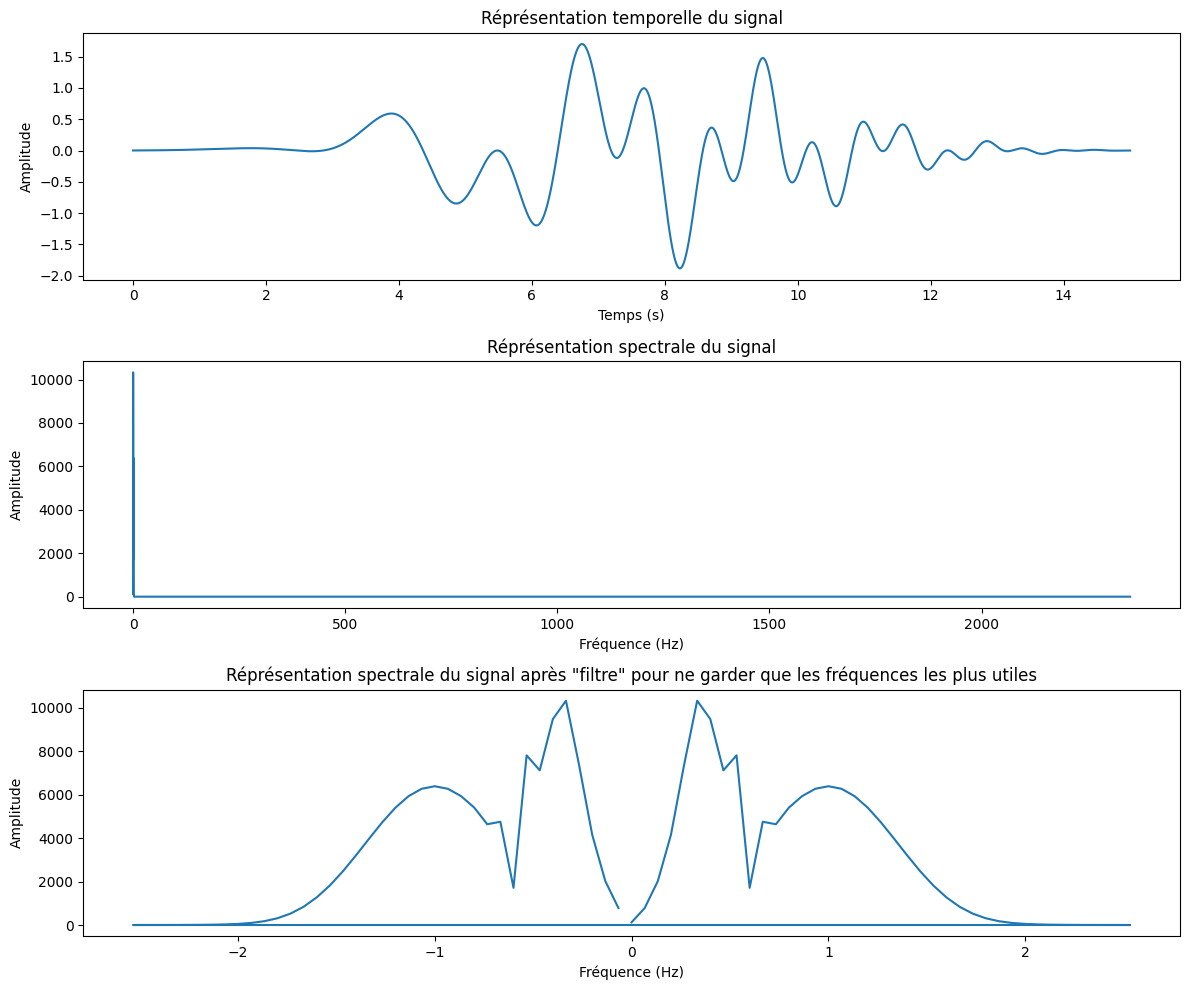

In [17]:
fc = 47.0 # carrier frequency
finfty = fc*1e2 # very high "continuous" frequency
T = 15. # duration of signal
N = round(finfty*T) # number of samples

t = np.arange(0.0, N)/finfty
pulsation1 = 2*np.pi*t/T
pulsation2 = 2*np.pi/np.sqrt(7)*t/T


xRaw = np.cos(pulsation1*t) + np.sin(pulsation2*t)

window = sig.windows.kaiser(N,9)
x = xRaw*window


plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal
plt.subplot(3, 1, 1)
plt.plot(t,x)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal')

#Repr√©sentation de la fft du signal

X=np.fft.fft(x)
freq=np.fft.fftfreq(N, d=1/finfty)



plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X[:N//2]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal')

indice_√†_garder = np.abs(X) > 1
X_tild=X[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


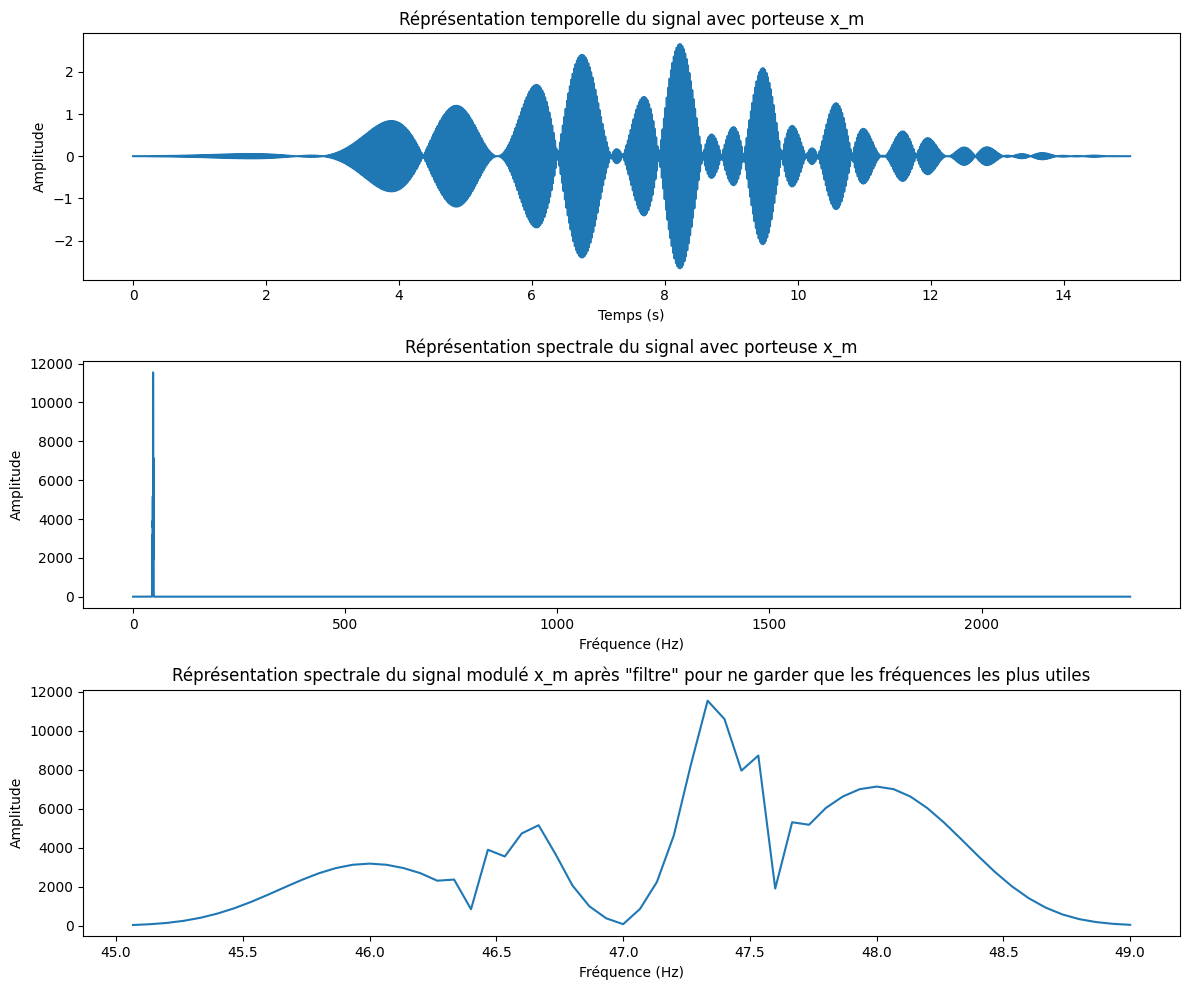

In [18]:
#fabrication du signal modul√©
x_m = x*np.cos(2*np.pi*fc*t)-sig.hilbert(x)*np.sin(2*np.pi*fc*t)

# Affichage
plt.figure(figsize=(12, 10))


#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_m)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_m')


#Repr√©sentation de la fft du signal

X_m=np.fft.fft(x_m)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_m[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_m')

indice_√†_garder = np.abs(X_m) > 40
X_m_tild=X_m[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild[freq_tild>=0],np.abs(X_m_tild[freq_tild>=0]))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_m apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()


On remarque que la transform√©e d'Hilbert ne parvient pas √† supprimer enti√®rement la partie "gauche" du spectre, mais √† tout de m√™me diminu√© l'amplitude de cette partie. Nous allons montrer que cette diminution ne change rien √† la d√©modulation et permet toujours de reconstruire le signal initial. En montrant que cette diminution n'a pas d'impacte, cela montrera en m√™me temps que la suppression totale de cette partie n'en aura pas non plus.

### B. D√©modulation synchrone ‚Äúanalogique‚Äù

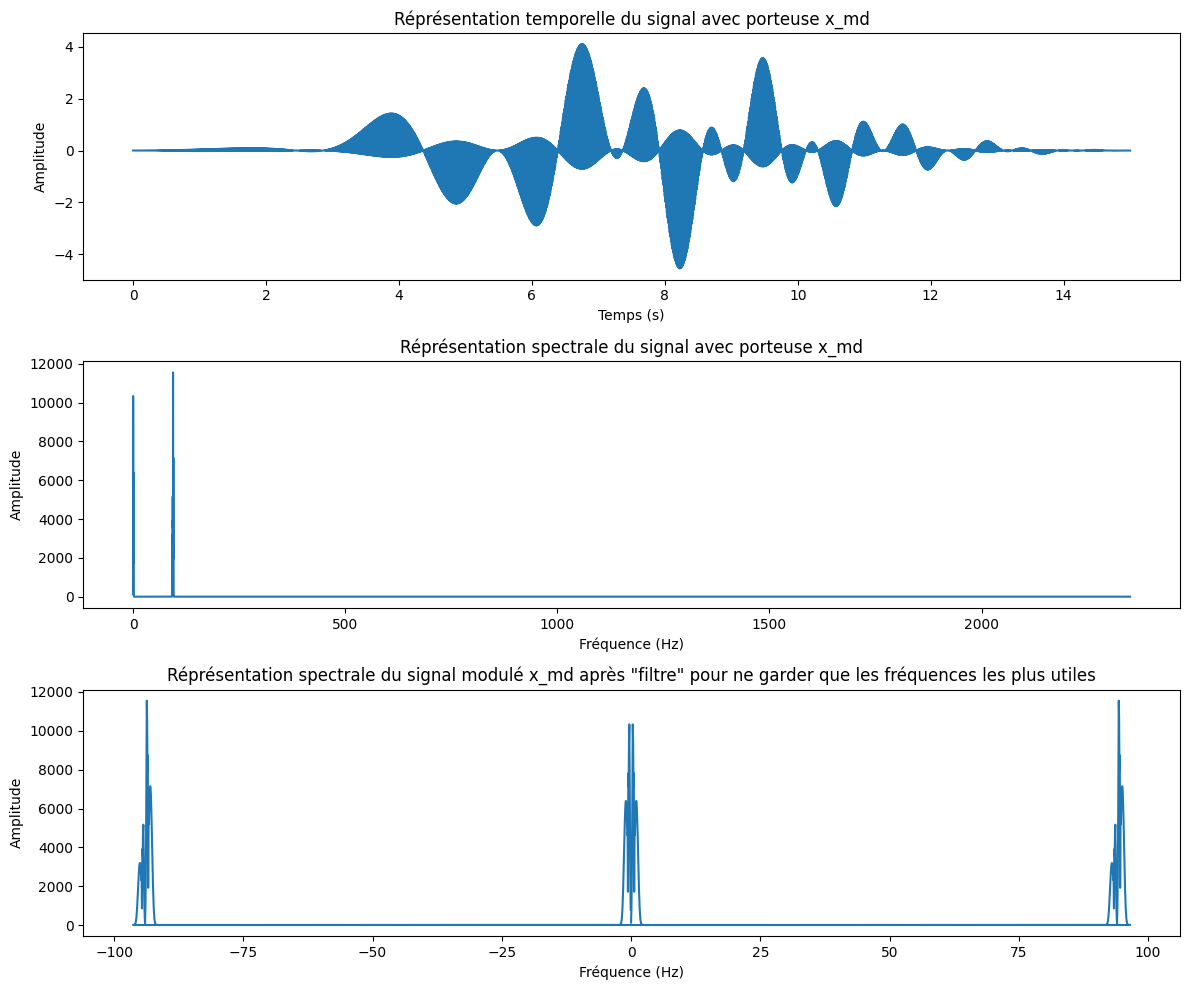

In [19]:
#fabrication du signal modul√©
x_md=2*x_m*np.cos(2*np.pi*fc*t)
# Affichage
plt.figure(figsize=(12, 10))

#Repr√©sentation temporelle du signal 
plt.subplot(3, 1, 1)
plt.plot(t,x_md)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation temporelle du signal avec porteuse x_md')

X_md=np.fft.fft(x_md)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],np.abs(X_md[:N//2]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal avec porteuse x_md')

indice_√†_garder = np.abs(X_md) > 1
X_md_tild=X_md[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)
plt.plot(freq_tild,np.abs(X_md_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_md apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

Pour filtrer le signal, on utilise un **filtre de Butterworth** de fr√©quence de coupure **$f_{coup}= 40Hz$** et d'**ordre 5** (afin de s'approcher du comportement id√©al). On choisit ces valeurs num√©riques au vu des trac√©s et √©tudes pr√©c√©dentes (afin de ne garder que la partie spectrale du signal initial et de supprimer la partie spectrale du √† la modulation).


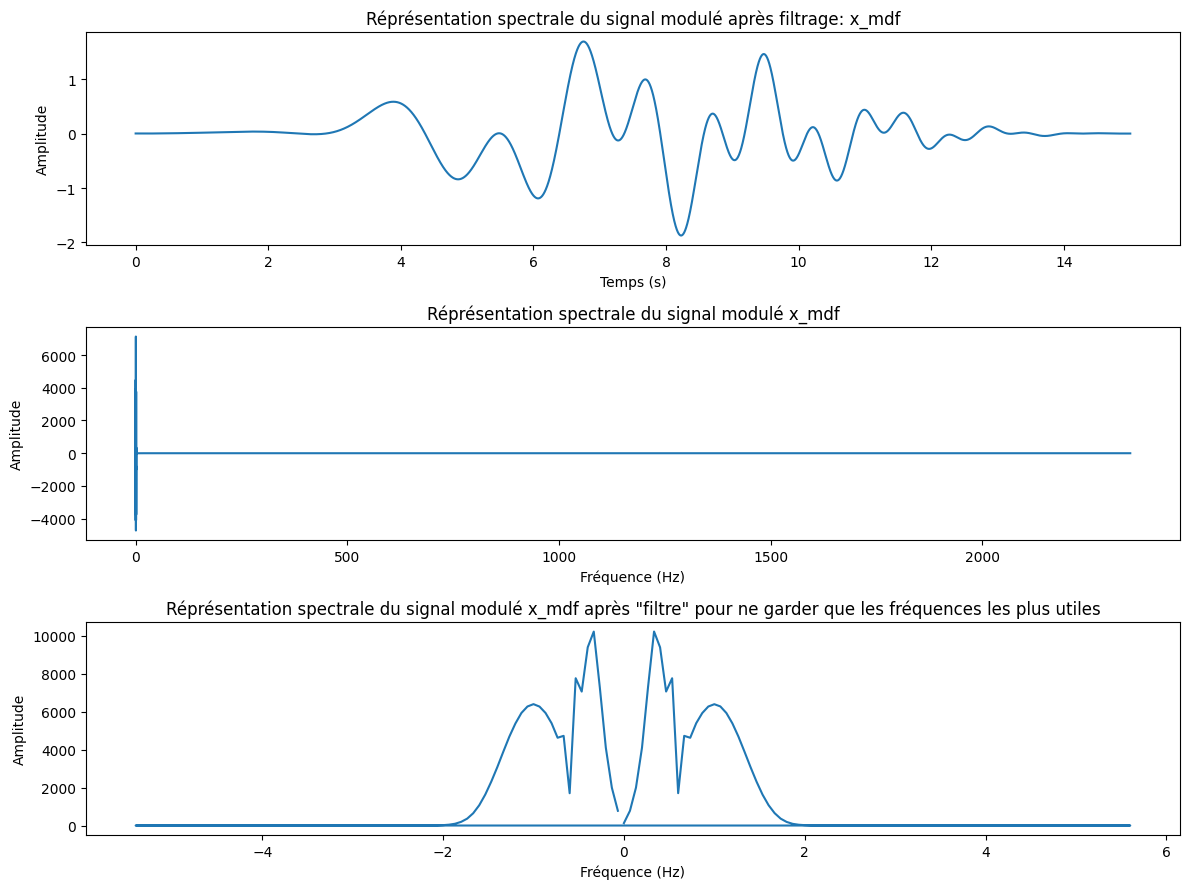

In [20]:
#filtre passe bas de fr√©quence de coupure: HZ

N_md=len(x_md)
dt=1e-5
f_coup=40

num_low,den_low=sig.butter(5,f_coup,btype='lowpass',fs=1/dt)
x_mdf=sig.filtfilt(num_low,den_low,x_md)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t,x_mdf)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© apr√®s filtrage: x_mdf')


X_mdf=np.fft.fft(x_mdf)
freq=np.fft.fftfreq(N, d=1/finfty)

plt.subplot(3, 1, 2)
plt.plot(freq[:N//2],X_mdf[:N//2])
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf')

indice_√†_garder = np.abs(X_mdf) > 1
X_mdf_tild=X_mdf[indice_√†_garder]
freq_tild=freq[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_tild,np.abs(X_mdf_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_mdf apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.show()

On retrouve le signal initial et son spectre. En filtrant les hautes fr√©quences, on a supprim√© les composantes spectrales de fr√©quence plus grande que 40Hz. Ainsi, on a supprimer la modulation ajout√©e sur le signal.



Pour un √©chantillonage apr√®s d√©modulation, il faudrait √©chantillonner $x_{mdf}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*2 = 4Hz$ alors que pour un √©chantillonage avant d√©modulation, il faudrait √©chantillonner $x_{m}$ √† une fr√©quence d'au moins $f_e=2f_{max}= 2*49 = 98Hz$.

Ainsi, il est pr√©f√©rable d'√©chantillonner le signal **apr√®s d√©modulation**, car ce dernier sera moins co√ªteux (fr√©quence d'√©chantillonnage $f_e$ plus faible dans ce cas).

### C. D√©modulation synchrone par sous-√©chantillonnage


[]

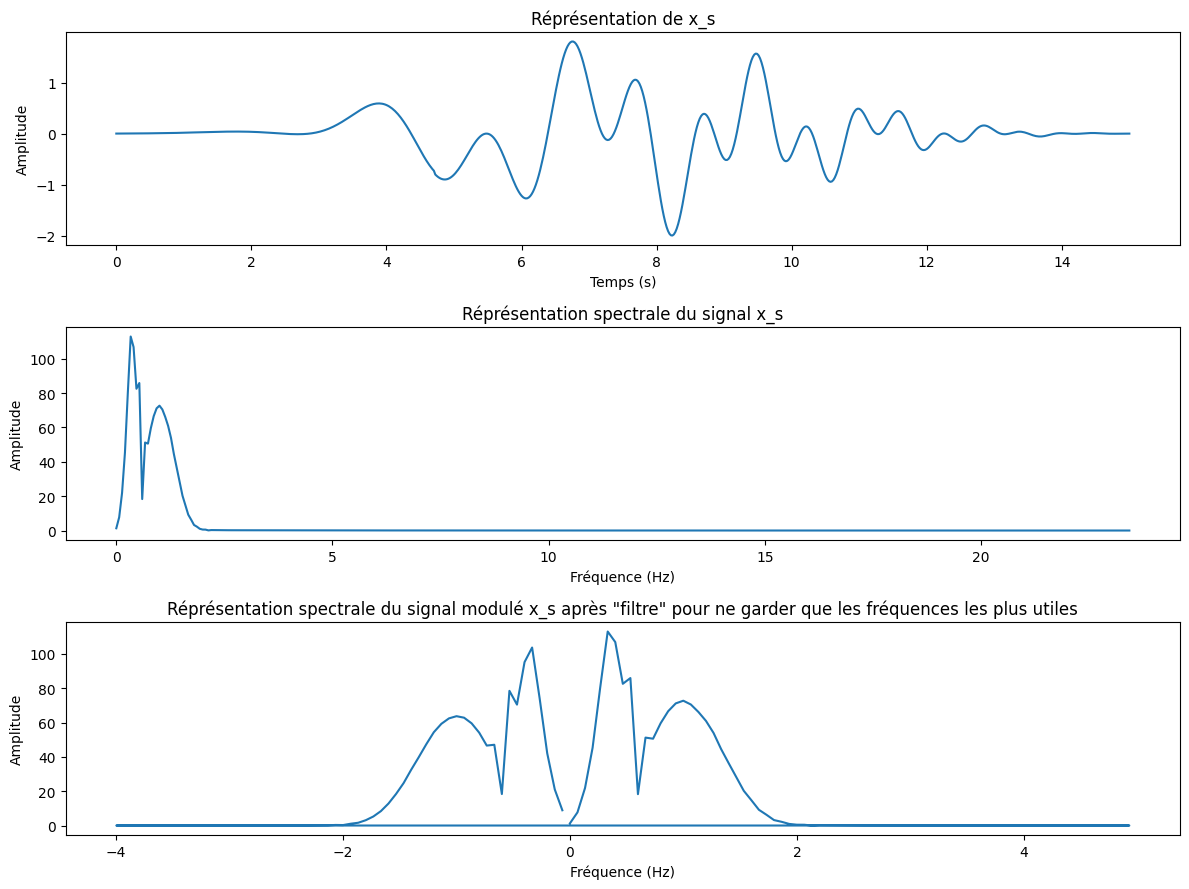

In [21]:
n=1
N_m=len(x_m)
f_s=fc/n
dt=1/f_s #pas d'√©chantillonnage

x_s=[]
t1=[]
t_comp=int(0)

while t_comp<T:

    indice=int(np.floor(t_comp*N_m/T))
    x_s.append(x_m[indice])
    t1.append(t_comp)
    t_comp+=dt

x_s=np.array(x_s)
t1=np.array(t1)

#Repr√©sentation temporelle du signal
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t1,x_s)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation de x_s')


X_s=np.fft.fft(x_s)
freq_s=np.fft.fftfreq(len(X_s), d=1/f_s)

plt.subplot(3, 1, 2)
plt.plot(freq_s[freq_s>=0],np.abs(X_s[freq_s>=0]))
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal x_s')

indice_√†_garder = np.abs(X_s) > 0.1
X_s_tild=X_s[indice_√†_garder]
freq_s_tild=freq_s[indice_√†_garder]

plt.subplot(3, 1, 3)

plt.plot(freq_s_tild,np.abs(X_s_tild))  
plt.xlabel('Fr√©quence (Hz)')
plt.ylabel('Amplitude')
plt.title('R√©pr√©sentation spectrale du signal modul√© x_s apr√®s "filtre" pour ne garder que les fr√©quences les plus utiles')

plt.tight_layout()
plt.plot()


 
On retrouve le signal initial. Cependant sons spectre n'est pas identique (modification de la valeur des amplitudes spectrales).

Cette m√©thode permet de se d√©barasser des fr√©quences du √† la modulation, i.e. sup√©rieures √† 90Hz (cela est possible en √©chantillonnant √† une fr√©quence 47Hz): avec une fr√©quence bien choisie, on ne "r√©cup√®re" lors de l'√©chantillonage que les extremas de l'enveloppe du √† la modulation (i.e. du √† la multiplication par $cos(2 \pi f_c t)$).

Cette m√©thode √† l'avantage de n'utiliser que le signal $x_m$ qui a une largeur spectrale beaucoup plus faible que $x_{md}$ et permet ainsi d'√©conomiser de la bande passante.



**Conclusion:**

La diminution da la partie "gauche" du spectre ne change rien  la restitution du signal. Ainsi, il est possible d'envisager sa supression pour economiser de la bande pasante (qui sera ainsi divis√©e par deux).